# Trabalho

### Entrega 29/02 as 23:59

# Importando o dados

### Baixando genius.zip

In [1]:
import gdown
fileid= '1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q'
url = 'https://drive.google.com/uc?id=' + fileid
output = 'genius.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q
To: /Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Mineração de Grafos/exercicios/genius.zip
100%|██████████| 1.11M/1.11M [00:00<00:00, 3.48MB/s]


'genius.zip'

### Extraindo genius.zip

In [2]:
file = 'genius.zip'
destine_dir = '../datasets'

!unzip -o {file} -d {destine_dir}

print(f'Contents of {file} have been successfully extracted to {destine_dir}.')

Archive:  genius.zip
  inflating: ../datasets/__MACOSX/._genius  
  inflating: ../datasets/__MACOSX/genius/._s05  
  inflating: ../datasets/__MACOSX/genius/._s02  
  inflating: ../datasets/__MACOSX/genius/._s03  
  inflating: ../datasets/__MACOSX/genius/._s04  
  inflating: ../datasets/__MACOSX/genius/._s01  
  inflating: ../datasets/__MACOSX/genius/._s06  
  inflating: ../datasets/__MACOSX/genius/._s08  
  inflating: ../datasets/__MACOSX/genius/._s07  
  inflating: ../datasets/genius/ref.txt  
  inflating: ../datasets/__MACOSX/genius/._ref.txt  
  inflating: ../datasets/genius/s05/got_s05e09.txt  
  inflating: ../datasets/__MACOSX/genius/s05/._got_s05e09.txt  
  inflating: ../datasets/genius/s05/got_s05e08.txt  
  inflating: ../datasets/__MACOSX/genius/s05/._got_s05e08.txt  
  inflating: ../datasets/genius/s05/got_s05e03.txt  
  inflating: ../datasets/__MACOSX/genius/s05/._got_s05e03.txt  
  inflating: ../datasets/genius/s05/got_s05e02.txt  
  inflating: ../datasets/__MACOSX/genius/s0

### Lendo os arquivos

In [3]:
import glob

caminho = '../datasets/genius/*/*.txt'
arquivos = glob.glob(caminho)

got = {}
for arquivo in sorted(arquivos):
    chave = arquivo[-14:-4]
    
    with open(arquivo, 'r', encoding = 'utf-8') as f:
        texto = f.read()
    
    got[chave] = texto


## Funções utilitárias

In [4]:
def get_lines(text):
    lines = text.split('\n')
    # remove linhas em branco
    lines = [line for line in lines if line != '']
    return lines

In [5]:
def get_first_name(name):
    return name.split(' ')[0]

def get_last_name(name):
    splited = name.split(' ')
    if len(splited) == 1:
        return ''
    else:
        return splited[-1]

In [6]:
def is_someone_speaking(line):
    line = line.upper()
    return line.find(':') > 0 \
        and not line.startswith('CUT TO') \
            and not line.startswith('"') \
                and not line.startswith('[') \
                    and not line.startswith('FADE TO:') \
                        and not line.startswith('FADE OUT.') \
                            and not line.startswith('THE END') \
                                and not line.startswith('END') \
                                    and not line.startswith('CONTINUED') \
                                        and not line.startswith('CONT.') \
                                            and not line.startswith('OMITTED') \
                                                and not line.startswith('OMIT') \


characters_to_ignore = ['EXT.', 'INT.', 'ALL', 'EXT', 'GUARD', 'INT', 'MEN', 'ALL THREE', 'ALL TOGETHER', 'BABY', 'BLACK HAIRED PROSTITUTE', 'BOTH', 'BOY', 'EVERYBODY', 'EVERYONE']
characters_to_ignore_start = ['WOMAN', 'WIFE', 'WILDLING', 'WHORE', 'UNSULLIED', 'YOUNG MAN', 'MAN', 'SOLDIER', 'A VOICE', 'BLOODRIDER', 'BOTH ', 'GUARD ']

def is_someone_to_ignore(characters_names):
    for character in characters_names:
        if character in characters_to_ignore:
            return True
        for character_start in characters_to_ignore_start:
            if character.startswith(character_start):
                return True
    return False


names_equals = {
    'ALLISER': 'ALLISER THORNE',
    'ARYA': 'ARYA STARK',
    'BARRISTAN': 'BARRISTAN SELMY',
    'BRAN': 'BRAN STARK',
    'BRAN\'S VOICE': 'BRAN STARK',
    'BRANN STARK': 'BRAN STARK',
    'BRAND': 'BRAN STARK',
    'BRINENNE': 'BRIENNE',
    'BRON': 'BRONN',
    'CATELYN': 'CATELYN STARK',
    'CATELYIN': 'CATELYN STARK',
    'CERSEI': 'CERSEI LANNISTER',
    'CERSEL': 'CERSEI LANNISTER',
    'CERSIE': 'CERSEI LANNISTER',
    'CESEI': 'CERSEI LANNISTER',
    'CERSEI BARATHEON': 'CERSEI LANNISTER',
    'DAENERYS': 'DAENERYS TARGARYEN',
    'DAENERYS STORMBORN': 'DAENERYS TARGARYEN',
    'DAENARYS STORMBORN': 'DAENERYS TARGARYEN',
    'DAERNEYS': 'DAENERYS TARGARYEN',
    'DAEYNERYS': 'DAENERYS TARGARYEN',
    'DANAERYS': 'DAENERYS TARGARYEN',
    'DANERYS': 'DAENERYS TARGARYEN',
    'DEANERYS TARGARIAN': 'DAENERYS TARGARYEN',
    'DENERYS': 'DAENERYS TARGARYEN',
    'DANY': 'DAENERYS TARGARYEN',
    'DAAERIO': 'DAARIO NAHARIS',
    'DAARIO': 'DAARIO NAHARIS',
    'DAV OS': 'DAVOS',
    'DOLOROUD EDD': 'DOLOROUS EDD',
    'DOLROUS EDD': 'DOLOROUS EDD',
    'GRAND MAESTER PYRCELLE': 'GRAND MAESTER PYCELLE',
    'JAIME': 'JAIME LANNISTER',
    'JAMIE LANNISTER': 'JAIME LANNISTER',
    'JEOR': 'JEOR MORMONT',
    'JOFFREY': 'JOFFREY BARATHEON',
    'JON': 'JON SNOW',
    'JOHN': 'JON SNOW',
    'JORAH': 'JORAH MORMONT',
    'LISA': 'LISA ARRYN',
    'NED': 'NED STARK',
    'EDDARD STARK': 'NED STARK',
    'EDDARK STARK': 'NED STARK',
    'ED': 'EDDISON TOLLETT',
    'EDD': 'EDDISON TOLLETT',
    'EDDISION': 'EDDISON TOLLETT',
    'EDDISON': 'EDDISON TOLLETT',
    'EURION': 'EURON GREYJOY',
    'EURON': 'EURON GREYJOY',
    'RENLY': 'RENLY BARATHEON',
    'ROB': 'ROBB STARK',
    'ROBB': 'ROBB STARK',
    'ROOSE': 'ROOSE BOLTON',
    'HIZDAHR ZO LORAQ': 'HIZDAHR',
    'SAM': 'SAMWELL TARLY',
    'SAMWELL': 'SAMWELL TARLY',
    'SAMWEL TARLY': 'SAMWELL TARLY',
    'SAMMY': 'SAMWELL TARLY',
    'SAME': 'SAMWELL TARLY',
    'SANSA': 'SANSA STARK',
    'THEON': 'THEON GREYJOY',
    'TYRION': 'TYRION LANNISTER',
    'TYRIOM': 'TYRION LANNISTER',
    'TYRON': 'TYRION LANNISTER',
    'YTRION': 'TYRION LANNISTER',
    'TYWIN': 'TYWIN LANNISTER',
    'TYWEN': 'TYWIN LANNISTER',
    'WALDER': 'WALDER FREY',
    'ALLISER THRONE': 'ALLISER THORNE',
    'AYRA': 'ARYA STARK',
    'BALON': 'BALON DWARF',
    'BENJEN': 'BENJEN STARK',
    'BERIC': 'BERIC DONDARRION',
    'THE HOUND': 'HOUND',
    'THE MOUNTAIN': 'MOUNTAIN',
    'MOUNTIAN': 'MOUNTAIN',
    'MYRCELLA': 'MYRCELLA BARATHEON',
    'JANOS': 'JANOS SLYNT',
    'JANOS SLUNT': 'JANOS SLYNT',
    'JOFFREY DWARF': 'JOFFREY BARATHEON',
    'JOFFFREY': 'JOFFREY BARATHEON',
    'KING JOFFREY': 'JOFFREY BARATHEON',
    'KARL': 'KARL TANNER',
    'LANCEL': 'LANCEL LANNISTER',
    'DROGO': 'KHAL DROGO',
    'LYANNA': 'LYANNA MORMONT',
    'LYSA': 'LYSA ARRYN',
    'MACE': 'MACE TYRELL',
    'PETYR': 'PETYR BAELISH',
    'PYELLE': 'PYCELLE',
    'RAMSEY': 'RAMSAY BOLTON',
    'RAMSAY': 'RAMSAY BOLTON',
    'ROBERT': 'ROBERT BARATHEON',
    'ROBIN': 'ROBIN ARRYN',
    'VISERYS': 'VISERYS TARGARYEN',
}

def fix_names(name):
    if(name in names_equals):
        return names_equals[name]
    else:
        return name.strip()


def get_characters_speaking(line):
    names = []
    if is_someone_speaking(line):
        character = line.split(':')[0].upper()
        # remove o conteúdo dentro dos parênteses do nome do personagem
        character = character.split('(')[0].strip()
        # se tiver um nome com / (ex: Ned/Catelyn), separa e adiciona os dois nomes
        if '/' in character:
            names = [fix_names(name) for name in character.split('/')]
        if ' & ' in character:
            names = [fix_names(name) for name in character.split(' & ')]

        else:
            names.append(fix_names(character))
        
    return names


In [7]:
def get_scenes(ep_lines):
    scenes = []
    
    scene = {
        'title' : 'Início do episódio',
        'lines' : []
    }
    for ep_line in ep_lines:
        if is_someone_speaking(ep_line):
            line = ep_line.split(':')[1]
            characters_speaking = get_characters_speaking(ep_line)
            
            if is_someone_to_ignore(characters_speaking):
                continue

            scene['lines'].append({
                'character' : {
                    'speaking' : characters_speaking,
                },
                'line' : line
            })
        else:
            scene = {
                'title' : ep_line,
                'lines' : []
            }
            scenes.append(scene)
    return scenes

In [8]:
def get_episodes(got):
    episodes = {}
    for key in got.keys():
        ep_lines = get_lines(got[key])
        title = ep_lines[0]

        if title.lower().startswith('episode'):
            ep_lines.pop(0)
        else:
            title = key

        episodes[key] = {
            'title' : title,
            'scenes' : get_scenes(ep_lines)
        }
    return episodes

In [9]:
def get_list_characters(episodios):
    characteres_speaking = []
    connections_by_scene = []
    for key in episodios.keys():
        scenes = episodios[key]['scenes']
        for scene in scenes:
            lines = scene['lines']
            characteres_in_scene = []
            for line in lines:
                characteres_in_scene += line['character']['speaking']
            if(len(characteres_in_scene) > 0):
                characteres_speaking += characteres_in_scene
                connections_by_scene.append(set(characteres_in_scene))

    characters_names = sorted(set(characteres_speaking))
    # print(connections_by_scene)

    # cria um dicionário com os nomes dos personagens e a frequência com que eles aparecem
    characters = []
    for i, name in enumerate(characters_names):
        character = {
            'id': i,
            'name' : name,
            'frequency' : characteres_speaking.count(name),
            'scenes' : len([scene for scene in connections_by_scene if name in scene]),
            'connections' : {},
            'connections_weight' : 0,
        }

        characters.append(character)
        for connection in connections_by_scene:
            if name in connection:
                for connection_name in connection:
                    if connection_name != name:
                        character['connections_weight'] += 1
                        if connection_name in character['connections']:
                            character['connections'][connection_name] += 1
                        else:
                            character['connections'][connection_name] = 1
            
    return characters

## Trabalhando o dado

### Converte todas as linhas de texto para formatos de episodios, cenas e falas

In [10]:
episodios = get_episodes(got)

### Cria uma lista dos personagens relevantes para a análise

In [11]:
def get_list_characters_importants(episodios, min_frequency=10, order='frequency'):
    characters = get_list_characters(episodios)
    # remova os personagens que aparecem poucas vezes na serie
    characters = [character for character in characters if character['frequency'] > min_frequency]
    # sort by order
    characters = sorted(characters, key=lambda k: k[order], reverse=True)
    return characters

characters = get_list_characters_importants(episodios)

print('total de personagens', len(characters))

total de personagens 185


## Análise por episódios dos personagens mais relevantes

In [12]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go


def plot_personagem_mais_frenquentes(characters, title='Personagens que mais aparecem em Game of Thrones'):
    df = pd.DataFrame(characters[:10])
    fig = go.Figure()
    fig.update_layout(title_text=title)
    fig.update_xaxes(title_text='Personagens')
    fig.update_yaxes(title_text='Falas e cenas')
    fig.add_trace(go.Bar(
        x=df['name'],
        y=df['frequency'],
        name='Falas',
        textposition='auto',
        text=df['frequency'],
        hovertemplate='<b>%{x}</b><br><br>' +
                    'falas: %{y}<br>',
    ))

    fig.add_trace(go.Bar(
        x=df['name'],
        y=df['scenes'],
        name='Cenas',
        textposition='auto',
        text=df['scenes'],
        texttemplate='%{y:.2s}',
        textfont_size=12,
        marker_line_width=1.5,
        hovertemplate='<b>%{x}</b><br><br>' +
                    'Cenas: %{y}<br>',
    ))
    fig.show()


### Gráficos dos personagens mais relevantes por temporada

In [13]:
currentSeason = 'Season 01'
episodes_season = {}

def plot_characters(currentSeason, episodes_season):
    characters_season = get_list_characters_importants(episodes_season, min_frequency=20)
    plot_personagem_mais_frenquentes(characters_season, title=currentSeason)

for key, episode in episodios.items():
    season = 'Season ' + key[5:7]
    title = season + ' - ' + episode['title']
    if season != currentSeason:
        plot_characters(currentSeason, episodes_season)
        currentSeason = season
    
    episodes_season[key] = episode

plot_characters(currentSeason, episodes_season)

### Gráficos dos personagens mais relevantes de toda a série

In [14]:
plot_personagem_mais_frenquentes(characters)

# Grafo da rede de conexões dos personagens

* Tamanho e cor dos nós representa a quantidade de falas que cada personagem teve, ou seja a frequência com que ele aparece na série, quando maior o nó mais vezes ele aparece na série.
* As aresta representa a conexão de um personagem com outro. Para isso foi levado em consideração personagem que aparecem na mesma cena. 
    * A espessura da aresta indica a quantidade de cenas que aqueles personagens apareceram juntos, assim indicando uma maior conexão entre eles.

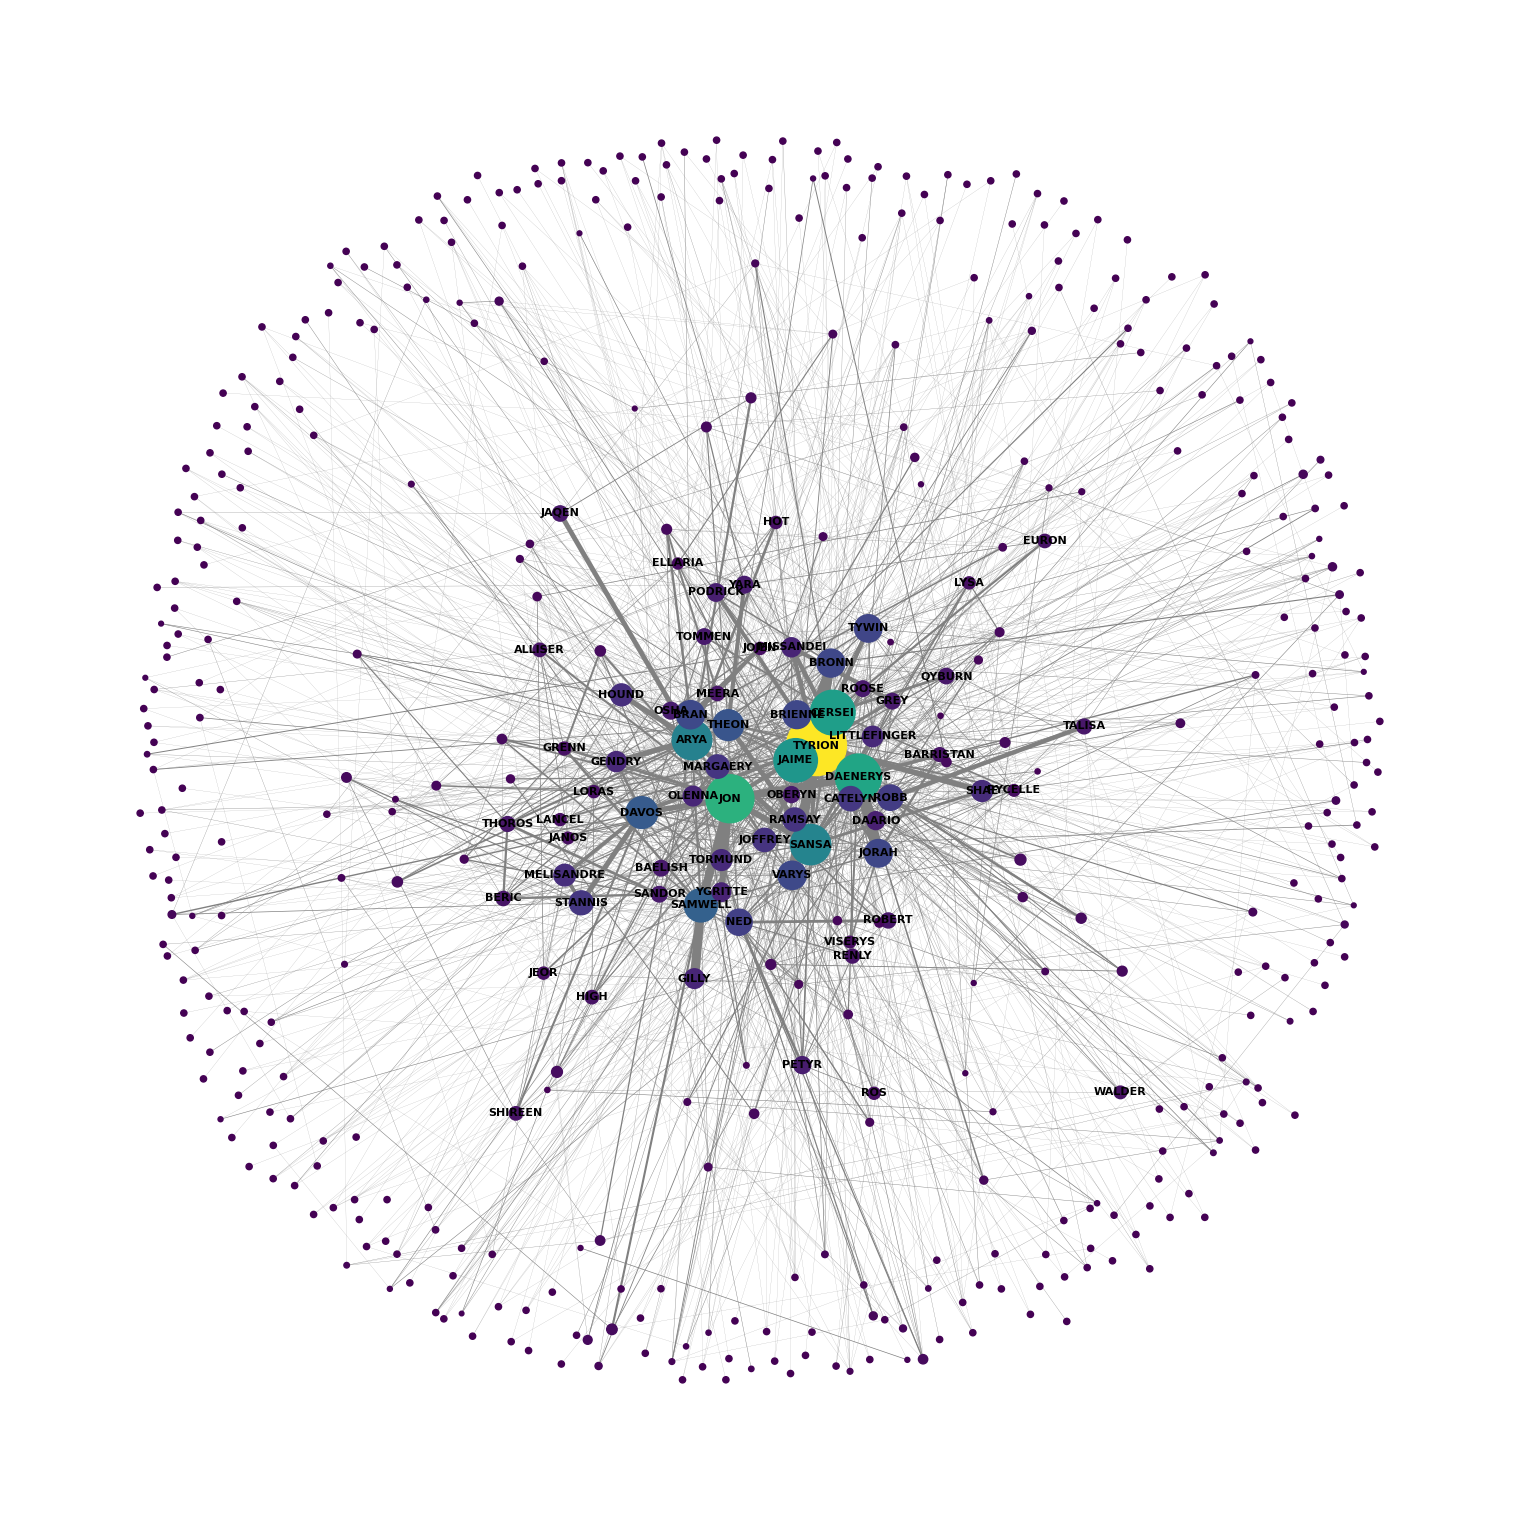

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for character in characters:
    G.add_node(character['name'],
               frequency=character['frequency'],
               first_name=get_first_name(character['name']),
               house=get_last_name(character['name']))

for character in characters:
    connections = character['connections']
    for connection in connections:
        G.add_edge(character['name'], connection,
                   weight=connections[connection], curvature=0.2)

node_sizes = []
for n, attrs in G.nodes(data=True):
    if 'frequency' in attrs:
        node_sizes.append(attrs['frequency'])
    else:
        node_sizes.append(20)

# pega os primeiro nodes que são os mais frequentes para exibir os nomes apenas dos principais para facilitar a visualização
nodes_to_label = list(G.nodes())[:70]

# cria um dicionário com os nomes dos nodes que serão rotulados
labels = {node: get_first_name(node) for node in nodes_to_label}

# define a largura das arestas
edge_widths = [G[u][v]['weight'] / 10 for u, v in G.edges()]

# define a cor dos nodes
max_weight = max(
    [attrs['frequency'] if 'frequency' in attrs else 0 for n, attrs in G.nodes(data=True)])
node_colors = []
for n, attrs in G.nodes(data=True):
    if 'frequency' in attrs:
        node_colors.append(plt.cm.viridis(G.nodes[n]['frequency']/max_weight))
    else:
        node_colors.append(plt.cm.viridis(0))

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, 
                       k=1, 
                    #    scale=10, 
                       iterations=50, 
                       seed=42)
nx.draw(G,
        pos,
        with_labels=True,
        font_weight='bold',
        node_size=node_sizes,
        edge_color='grey',
        width=edge_widths,
        font_size=8,
        labels=labels,
        node_color=node_colors,
        )
plt.show()

## Grafo para demostrar as comunidades detectadas

* Cada cor representa uma comunidade e as conexões entre elas

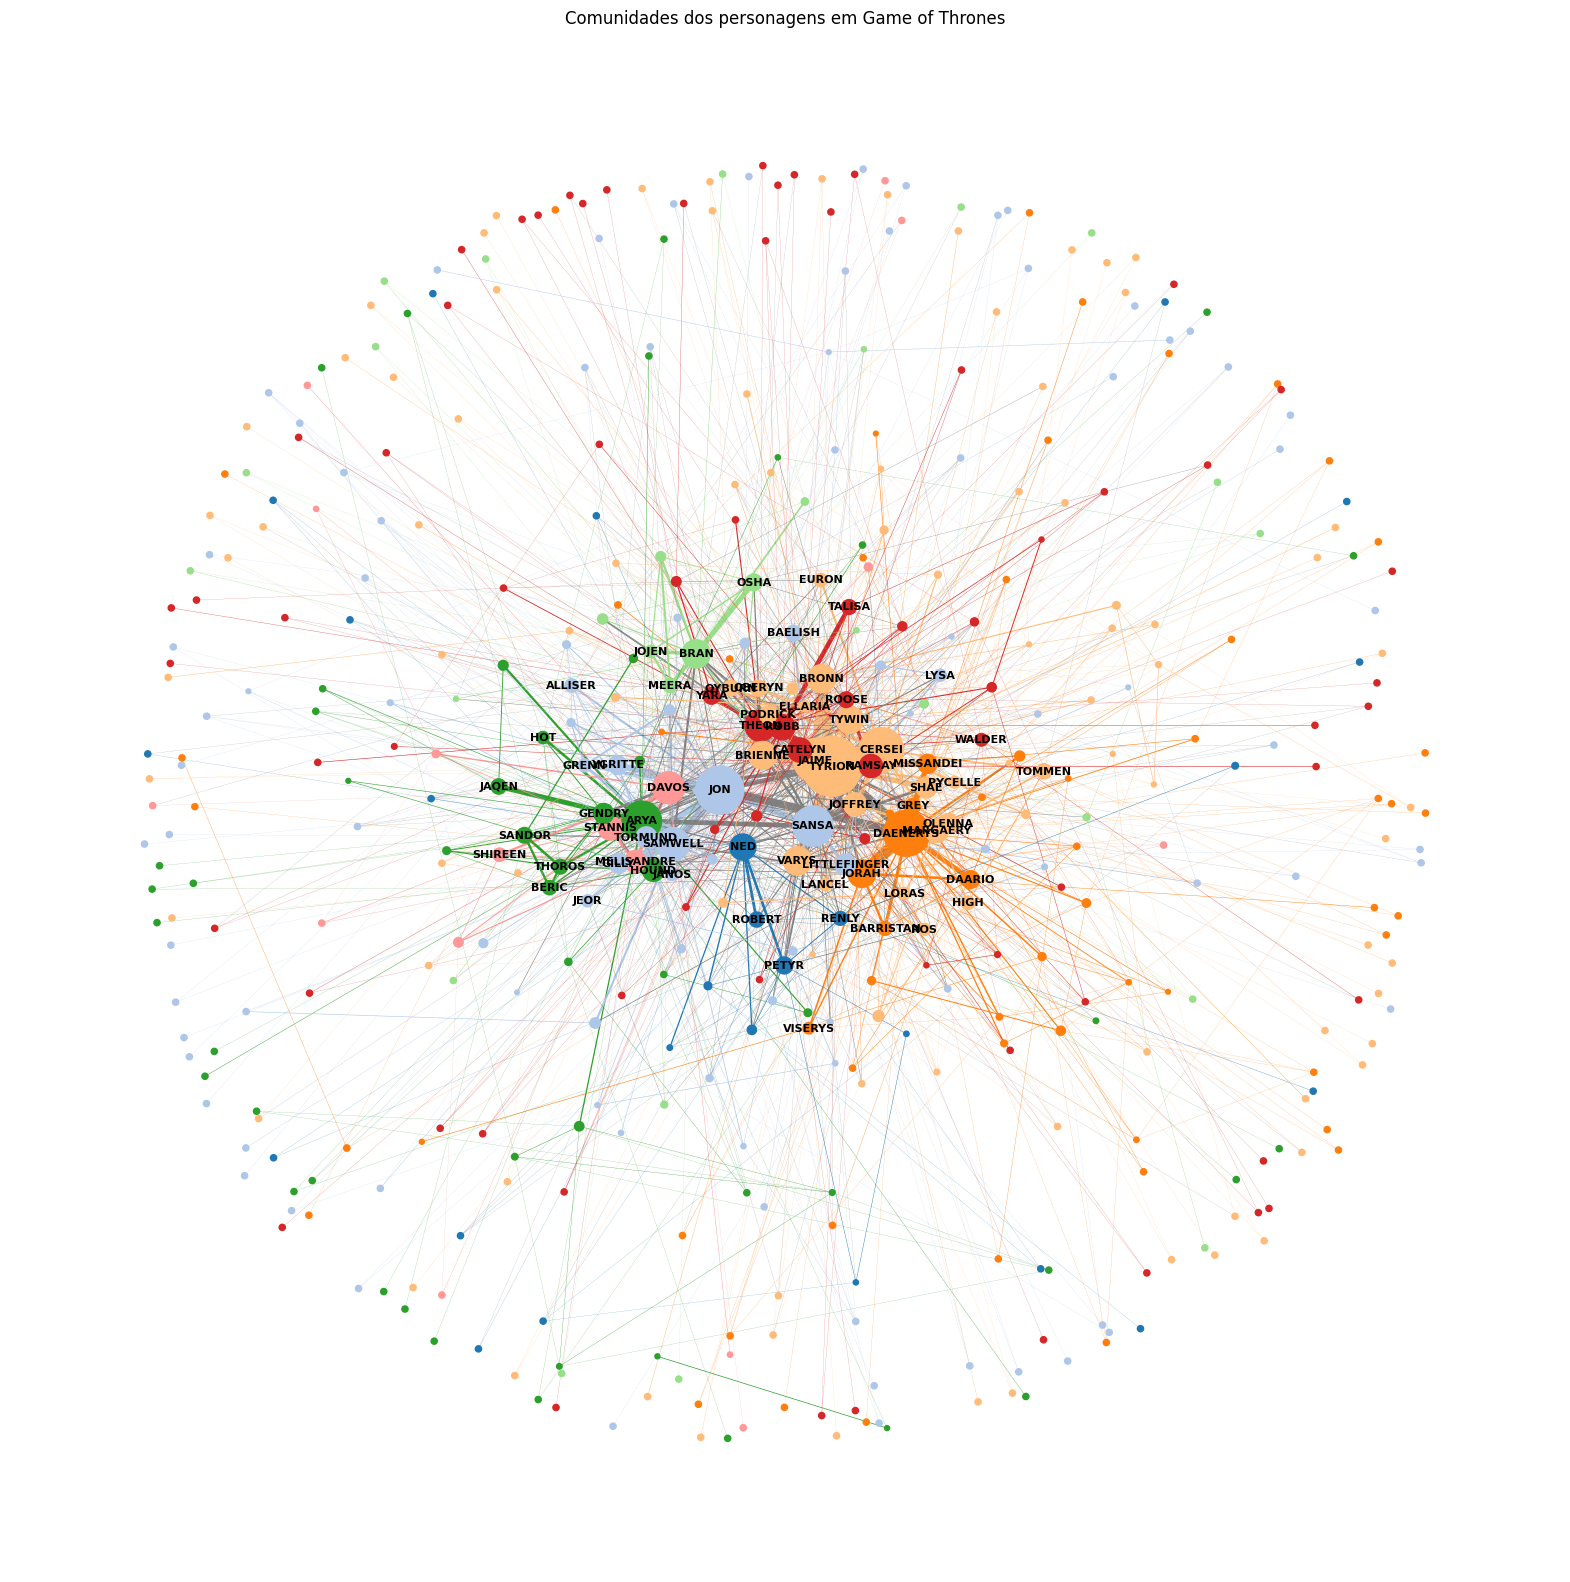

In [16]:
from community import community_louvain
partition = community_louvain.best_partition(G)

# cria um dicionário com os nomes dos nodes e a partição a que eles pertencem
partition_dict = {}
for node in partition:
    partition_dict[node] = partition[node]

# define a cor das arestas de acordo com a partição
edge_colors = []
for u, v in G.edges():
    if partition[u] == partition[v]:
        edge_colors.append(plt.cm.tab20(partition[u]))
    else:
        edge_colors.append('grey')

# define a cor dos nodes de acordo com a partição
node_colors = []
for n, attrs in G.nodes(data=True):
    node_colors.append(plt.cm.tab20(partition[n]))

pos = nx.spring_layout(G, 
                       k=1, 
                       scale=1, 
                       iterations=100, 
                       seed=42)
plt.figure(figsize=(20,20))
plt.title('Comunidades dos personagens em Game of Thrones')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_sizes, edge_color=edge_colors, width=edge_widths, font_size=8, labels=labels, node_color=node_colors)
plt.show()


# Métricas de rede 

### 1. Densidade da Rede:

* A densidade da rede mede a proporção de conexões existentes em relação ao número total possível de conexões em um grafo.
* É uma métrica que varia de 0 a 1, onde 0 indica que não há conexões e 1 indica que todas as possíveis conexões estão presentes.
* A densidade da rede é usada para entender o quão conectada é uma rede e pode indicar o nível de interação entre seus nós.

In [17]:
density = nx.density(G)
print(f'Densidade: {density:.4f}')

Densidade: 0.0144


### 2. Diâmetro da Rede:

* O diâmetro da rede é a maior distância geodésica (o menor número de arestas) entre dois nós na rede.
* Ele fornece uma medida da distância máxima entre quaisquer dois pontos na rede.
* O diâmetro é útil para entender quão distantes estão os nós mais afastados em uma rede e pode influenciar a eficiência das comunicações.

In [18]:
diameter = nx.diameter(G)
print(f'Diâmetro: {diameter}')

Diâmetro: 7


### 3. Coeficiente de Agrupamento (Clustering Coefficient):

* O coeficiente de agrupamento mede a probabilidade de que os vizinhos de um nó estejam conectados entre si.
* Ele quantifica a tendência de formação de grupos ou clusters na rede.
* Um coeficiente de agrupamento alto indica uma rede altamente clusterizada, enquanto um valor baixo indica uma rede mais dispersa.

In [19]:
clustering = nx.average_clustering(G)
print(f'Coeficiente de agrupamento: {clustering:.4f}')

Coeficiente de agrupamento: 0.5368


# Métricas de centralidade

In [20]:
# função para plota a métrica de centralidade
def plot_metrica_centrality(metrica, title, ascending=False):
    df = pd.DataFrame(list(metrica.items()), columns=['Personagem', title])
    df = df.sort_values(by=title, ascending=ascending)
    df = df.head(10)
    fig = px.bar(df, x='Personagem', y=title, title=title + ' dos personagens em Game of Thrones')
    fig.show()

### 1. Grau de Centralidade:

* A grau de centralidade mede a importância de um nó com base no número de conexões diretas que ele possui.
* Um nó com um alto grau de centralidade é aquele que está diretamente conectado a muitos outros nós na rede.
* É útil para identificar nós que têm muitas conexões diretas e, portanto, desempenham um papel importante na difusão de informações ou influência na rede.

In [21]:
degree_centrality = nx.degree_centrality(G)
print('Grau de Centralidade', degree_centrality)
plot_metrica_centrality(degree_centrality, 'Grau de Centralidade')

Grau de Centralidade {'TYRION LANNISTER': 0.2189473684210526, 'JON SNOW': 0.16, 'DAENERYS TARGARYEN': 0.14947368421052631, 'CERSEI LANNISTER': 0.1326315789473684, 'JAIME LANNISTER': 0.12421052631578947, 'SANSA STARK': 0.13473684210526315, 'ARYA STARK': 0.13052631578947368, 'SAMWELL TARLY': 0.09473684210526316, 'DAVOS': 0.09473684210526316, 'THEON GREYJOY': 0.1094736842105263, 'VARYS': 0.07789473684210527, 'BRAN STARK': 0.11368421052631579, 'BRONN': 0.10526315789473684, 'BRIENNE': 0.07789473684210527, 'JORAH MORMONT': 0.08210526315789474, 'TYWIN LANNISTER': 0.05473684210526315, 'NED STARK': 0.08210526315789474, 'ROBB STARK': 0.07789473684210527, 'CATELYN STARK': 0.10736842105263157, 'STANNIS': 0.029473684210526315, 'MARGAERY': 0.04, 'JOFFREY BARATHEON': 0.08210526315789474, 'RAMSAY BOLTON': 0.04, 'HOUND': 0.04631578947368421, 'MELISANDRE': 0.04842105263157895, 'SHAE': 0.02526315789473684, 'TORMUND': 0.06315789473684211, 'LITTLEFINGER': 0.05052631578947368, 'GENDRY': 0.05894736842105263,

### 2. Centralidade de Proximidade:

* A centralidade de proximidade avalia a importância de um nó com base na sua distância média para todos os outros nós na rede.
* Um nó com uma alta centralidade de proximidade é aquele que está mais próximo de todos os outros nós em termos de caminhos mais curtos.
* É útil para identificar nós que podem se comunicar rapidamente com outros nós na rede.

In [22]:
closeness_centrality = nx.closeness_centrality(G)
print('Centralidade de proximidade', closeness_centrality)
plot_metrica_centrality(closeness_centrality, 'Centralidade de proximidade')

Centralidade de proximidade {'TYRION LANNISTER': 0.5289532293986637, 'JON SNOW': 0.5091103965702036, 'DAENERYS TARGARYEN': 0.4764292878635908, 'CERSEI LANNISTER': 0.4807692307692308, 'JAIME LANNISTER': 0.479313824419778, 'SANSA STARK': 0.49120992761116855, 'ARYA STARK': 0.4817444219066937, 'SAMWELL TARLY': 0.42754275427542754, 'DAVOS': 0.46844181459566075, 'THEON GREYJOY': 0.48028311425682507, 'VARYS': 0.4447565543071161, 'BRAN STARK': 0.46568627450980393, 'BRONN': 0.4233511586452763, 'BRIENNE': 0.46568627450980393, 'JORAH MORMONT': 0.42677448337825696, 'TYWIN LANNISTER': 0.39159109645507006, 'NED STARK': 0.4361799816345271, 'ROBB STARK': 0.4166666666666667, 'CATELYN STARK': 0.4554170661553212, 'STANNIS': 0.37254901960784315, 'MARGAERY': 0.38743882544861336, 'JOFFREY BARATHEON': 0.4166666666666667, 'RAMSAY BOLTON': 0.3793929712460064, 'HOUND': 0.4022015241320914, 'MELISANDRE': 0.4225978647686833, 'SHAE': 0.38, 'TORMUND': 0.4326047358834244, 'LITTLEFINGER': 0.41161178509532065, 'GENDRY'

### 3. Centralidade de Intermediação (Betweenness Centrality):

* A centralidade de intermediação mede a importância de um nó com base em sua posição de "ponte" entre outros nós na rede.
* Nós com alta centralidade de intermediação estão localizados em caminhos de comunicação cruciais entre outros nós.
* São importantes para controlar ou facilitar o fluxo de informações ou recursos na rede.

In [23]:
betweenness_centrality = nx.betweenness_centrality(G)
print('Centralidade de Intermediação', betweenness_centrality)
plot_metrica_centrality(betweenness_centrality, 'Centralidade de Intermediação')

Centralidade de Intermediação {'TYRION LANNISTER': 0.19353309622586903, 'JON SNOW': 0.15238408581466573, 'DAENERYS TARGARYEN': 0.15185675320913494, 'CERSEI LANNISTER': 0.0828890837401535, 'JAIME LANNISTER': 0.06565818982048645, 'SANSA STARK': 0.08954152561525926, 'ARYA STARK': 0.13210084619110307, 'SAMWELL TARLY': 0.054893463026803174, 'DAVOS': 0.058302877523974915, 'THEON GREYJOY': 0.0865416125269518, 'VARYS': 0.03135458860399698, 'BRAN STARK': 0.08302528837874296, 'BRONN': 0.04263484423246689, 'BRIENNE': 0.024946655342347045, 'JORAH MORMONT': 0.045686442043703396, 'TYWIN LANNISTER': 0.012689764801213659, 'NED STARK': 0.03931174140560621, 'ROBB STARK': 0.035149397623977854, 'CATELYN STARK': 0.05706530320808668, 'STANNIS': 0.002845810589570828, 'MARGAERY': 0.004236630481051724, 'JOFFREY BARATHEON': 0.022222566110437346, 'RAMSAY BOLTON': 0.02478091954769513, 'HOUND': 0.0162695259007157, 'MELISANDRE': 0.016098463612936074, 'SHAE': 0.0038077824716963304, 'TORMUND': 0.031187274849459726, '

### 4. Centralidade de Vetor Próprio (Eigenvector Centrality):

* A centralidade de vetor próprio avalia a importância de um nó com base não apenas em suas conexões diretas, mas também na importância dos nós aos quais está conectado.
* Um nó é considerado central se estiver conectado a outros nós centrais.
* É útil para identificar nós que têm conexões de alta qualidade com outros nós importantes na rede.

In [24]:
eigenvector_centrality = nx.eigenvector_centrality(G)
print('Centralidade de Vetor Próprio', eigenvector_centrality)
plot_metrica_centrality(eigenvector_centrality, 'Centralidade de Vetor Próprio')

Centralidade de Vetor Próprio {'TYRION LANNISTER': 0.2999800233207191, 'JON SNOW': 0.21127607081354366, 'DAENERYS TARGARYEN': 0.16601434498136422, 'CERSEI LANNISTER': 0.20583128255053137, 'JAIME LANNISTER': 0.21348656680720077, 'SANSA STARK': 0.22918406491200935, 'ARYA STARK': 0.18481255286382386, 'SAMWELL TARLY': 0.11337697899167165, 'DAVOS': 0.16229334223249448, 'THEON GREYJOY': 0.1532378147727339, 'VARYS': 0.15732230411575643, 'BRAN STARK': 0.16876635362853437, 'BRONN': 0.14687491828547442, 'BRIENNE': 0.17312721579365323, 'JORAH MORMONT': 0.09864464667248063, 'TYWIN LANNISTER': 0.09267733776244196, 'NED STARK': 0.14148211681572903, 'ROBB STARK': 0.09536791668235628, 'CATELYN STARK': 0.1778855933767077, 'STANNIS': 0.05231152128149869, 'MARGAERY': 0.08501722609398561, 'JOFFREY BARATHEON': 0.15461813389071846, 'RAMSAY BOLTON': 0.047155009882330685, 'HOUND': 0.09242848482335518, 'MELISANDRE': 0.092480247753463, 'SHAE': 0.060774335228094445, 'TORMUND': 0.1065907970398371, 'LITTLEFINGER':

### 5. Centralidade Global:

* A centralidade global é uma métrica que avalia a importância global de um nó em relação a toda a rede.
* Ela considera características como a centralidade de grau, centralidade de proximidade e centralidade de intermediação, combinando várias métricas de centralidade em uma única medida.
* A centralidade global pode ajudar a identificar os nós mais influentes ou centrais na rede como um todo.

In [25]:
centralidade_global = {}
for personagem in characters:
    centralidade_global[personagem['name']] = (degree_centrality[personagem['name']] + closeness_centrality[personagem['name']] + betweenness_centrality[personagem['name']]) / 3

plot_metrica_centrality(centralidade_global, 'Centralidade Global')


# Alguma outras métricas que podem ser úteis

### 1. Grau

O grau de um nó em um grafo é uma medida fundamental que representa o número de arestas que estão conectadas a esse nó. Em outras palavras, o grau de um nó indica quantas conexões diretas ele tem com outros nós no grafo. 

In [26]:
degree = nx.degree(G)
degree = dict(degree)
degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree, columns=['Personagem', 'Grau'])
degree = degree.set_index('Personagem')

# plot grau do top 10 personagens
fig = px.bar(degree.head(10), x=degree.head(10).index, y='Grau', title='Grau dos personagens em Game of Thrones')
fig.show()

### 2. Excentricidade
A excentricidade de um vértice em um grafo é uma medida que indica a distância máxima entre esse vértice e qualquer outro vértice no grafo. Em outras palavras, a excentricidade de um vértice é o comprimento do caminho mais longo entre esse vértice e qualquer outro vértice no grafo.

In [27]:
eccentricity = nx.eccentricity(G)
print('excentricidade do grafo', eccentricity)
plot_metrica_centrality(eccentricity, 'Excentricidade', ascending=True)

excentricidade do grafo {'TYRION LANNISTER': 4, 'JON SNOW': 4, 'DAENERYS TARGARYEN': 4, 'CERSEI LANNISTER': 4, 'JAIME LANNISTER': 5, 'SANSA STARK': 4, 'ARYA STARK': 4, 'SAMWELL TARLY': 5, 'DAVOS': 4, 'THEON GREYJOY': 4, 'VARYS': 5, 'BRAN STARK': 4, 'BRONN': 5, 'BRIENNE': 4, 'JORAH MORMONT': 5, 'TYWIN LANNISTER': 4, 'NED STARK': 4, 'ROBB STARK': 5, 'CATELYN STARK': 4, 'STANNIS': 5, 'MARGAERY': 5, 'JOFFREY BARATHEON': 4, 'RAMSAY BOLTON': 5, 'HOUND': 4, 'MELISANDRE': 4, 'SHAE': 5, 'TORMUND': 4, 'LITTLEFINGER': 4, 'GENDRY': 4, 'OLENNA': 5, 'GILLY': 5, 'MISSANDEI': 5, 'YGRITTE': 5, 'DAARIO NAHARIS': 5, 'PODRICK': 4, 'PETYR BAELISH': 4, 'OSHA': 5, 'YARA': 4, 'OBERYN': 5, 'BAELISH': 5, 'ROOSE BOLTON': 5, 'SANDOR': 4, 'GREY WORM': 4, 'TOMMEN': 5, 'QYBURN': 5, 'JAQEN': 5, 'ROBERT BARATHEON': 4, 'TALISA': 5, 'THOROS': 4, 'BERIC DONDARRION': 4, 'MEERA': 5, 'RENLY BARATHEON': 5, 'BARRISTAN SELMY': 5, 'ALLISER THORNE': 5, 'HIGH SPARROW': 5, 'SHIREEN': 5, 'EURON GREYJOY': 5, 'GRENN': 5, 'WALDER FREY

### 3. Raio do grafo
O raio de um grafo é uma medida que representa a excentricidade mínima entre todos os vértices desse grafo. Em outras palavras, o raio de um grafo é o menor valor de excentricidade entre todos os vértices do grafo.

In [28]:
radius = nx.radius(G)
print('raio do grafo', radius)

raio do grafo 4


### 4. Centro do grafo
O centro de um grafo é um conjunto de vértices no grafo que têm a menor excentricidade em relação a todos os outros vértices no mesmo grafo. Em outras palavras, o centro do grafo consiste nos vértices que estão mais próximos de todos os outros vértices no grafo.

In [29]:
center = nx.center(G)
print('centro do grafo', center)

centro do grafo ['TYRION LANNISTER', 'JON SNOW', 'DAENERYS TARGARYEN', 'CERSEI LANNISTER', 'SANSA STARK', 'ARYA STARK', 'DAVOS', 'THEON GREYJOY', 'BRAN STARK', 'BRIENNE', 'TYWIN LANNISTER', 'NED STARK', 'CATELYN STARK', 'JOFFREY BARATHEON', 'HOUND', 'MELISANDRE', 'TORMUND', 'LITTLEFINGER', 'GENDRY', 'PODRICK', 'PETYR BAELISH', 'YARA', 'SANDOR', 'GREY WORM', 'ROBERT BARATHEON', 'THOROS', 'BERIC DONDARRION', 'HOT PIE', 'YOREN', 'JORY CASSEL', 'ANGUY', 'CAPTAIN', 'OLD MAN', 'PROSTITUTE', 'TWYIN', 'MERYN TRANT', 'GIRL', 'GOLD CLOAK', 'RORGE']


### 5. A periferia de um grafo
A periferia de um grafo é o conjunto de vértices que têm a maior excentricidade em relação a todos os outros vértices no mesmo grafo. Em outras palavras, a periferia do grafo consiste nos vértices que estão mais afastados de todos os outros vértices no grafo.

In [30]:
periphery = nx.periphery(G)
print('periferia do grafo', periphery)

periferia do grafo ['MAESTER 2', 'ELARIA', 'LADYC RANE']


### 6. Coeficiente de clustering de um nó específico

O coeficiente de clustering de um nó específico em um grafo mede a probabilidade de que seus vizinhos (os vértices diretamente conectados a ele) também estejam conectados entre si. Em outras palavras, ele indica a probabilidade de que os amigos de um nó também sejam amigos entre si. 

In [31]:
clustering = nx.clustering(G)
print('coeficiente de clusterização do grafo', clustering)

# plot coeficiente de clusterização em um histograma
fig = px.histogram(x=list(clustering.values()), 
                   title='Coeficiente de Clusterização dos personagens em Game of Thrones', 
                   labels={'value': 'Coeficiente de Clusterização'},
                   nbins=20)
# crie legendas para os eixos
fig.update_xaxes(title_text='Coeficiente de Clusterização')
fig.update_yaxes(title_text='Quantidade de personagens')
fig.show()



coeficiente de clusterização do grafo {'TYRION LANNISTER': 0.07991038088125467, 'JON SNOW': 0.10070175438596492, 'DAENERYS TARGARYEN': 0.08048289738430583, 'CERSEI LANNISTER': 0.13108038914490527, 'JAIME LANNISTER': 0.14962010520163646, 'SANSA STARK': 0.14285714285714285, 'ARYA STARK': 0.10629296668429403, 'SAMWELL TARLY': 0.14343434343434344, 'DAVOS': 0.1787878787878788, 'THEON GREYJOY': 0.11990950226244344, 'VARYS': 0.22522522522522523, 'BRAN STARK': 0.1334730957372467, 'BRONN': 0.10857142857142857, 'BRIENNE': 0.26126126126126126, 'JORAH MORMONT': 0.14035087719298245, 'TYWIN LANNISTER': 0.23384615384615384, 'NED STARK': 0.18218623481781376, 'ROBB STARK': 0.15465465465465467, 'CATELYN STARK': 0.15764705882352942, 'STANNIS': 0.34065934065934067, 'MARGAERY': 0.3742690058479532, 'JOFFREY BARATHEON': 0.2253711201079622, 'RAMSAY BOLTON': 0.16374269005847952, 'HOUND': 0.2510822510822511, 'MELISANDRE': 0.2924901185770751, 'SHAE': 0.3939393939393939, 'TORMUND': 0.20229885057471264, 'LITTLEFIN

In [36]:
# calcula a assortatividade do grafo
assortativity = nx.degree_assortativity_coefficient(G)
print('assortatividade do grafo', assortativity)

assortativity = nx.attribute_assortativity_coefficient(G, 'house')
print('assortatividade por casa', assortativity)

assortativity = nx.attribute_assortativity_coefficient(G, 'frequency')
print('assortatividade por frequência', assortativity)


assortatividade do grafo -0.18920384697316478
assortatividade por casa -0.030844832859141903
assortatividade por frequência -0.04791663848750717


# Conclusão

Após essa análise foi possível concluir que os personagens principais são Tyrion Lannister, Jon Snow e Daenerys Targeryen, respectivamente nessa ordem de importância.